<h1>MNIST Classification using CNNs</h1>

---



# Importing Keras Modules


In [1]:
#Importing important modules
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#Installing Tensorboard
!pip install Tensorboard

# Loading the Dataset

<h3>Download train and test sets of  MNIST dataset</h3>

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


<h4>Visualizing the dataset</h4>

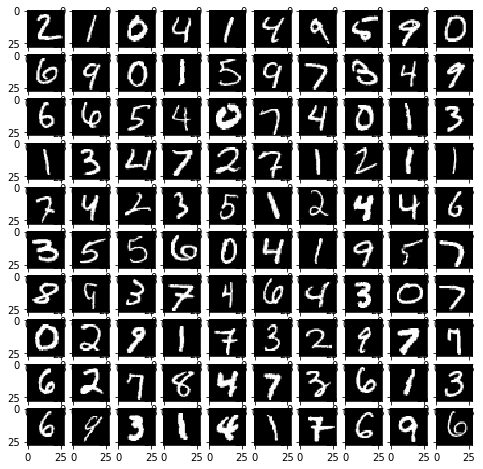

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

<h3>Reshape train and test sets into shapes compatible with keras models</h3>

<h4>Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.</h4>


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [0]:
batch_size = 128
num_classes = 10
epochs = 25

In [8]:
print(y_train[0])

5


<h4>Convert Labels from digits to one hot vectors</h4>

In [0]:
# convert class vectors to binary class matrices
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the CNN 

<h4>Define the layers of model</h4>

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

<h4>Setting Optimizer and Loss function for training</h4>

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Training the CNN 

<h4>Initializing the Tensorboard callback for visualization of training</h4>

In [0]:
#Import tensorboard callback which will passed in model.fit function.
from tensorflow.keras.callbacks import TensorBoard
from time import time


#Setting the directory to store the logs.
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))


<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [20]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

W0517 17:16:55.911530 140505463560064 callbacks.py:886] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


<h4>Fit the model to the dataset</h4>

In [21]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard,early_stopping,model_checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
59264/60000 [============================>.] - ETA: 0s - loss: 0.2350 - accuracy: 0.9271
Epoch 00001: val_loss improved from inf to 0.05571, saving model to mnist_cnn_checkpoint_01_loss0.0557.h5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2336 - accuracy: 0.9276 - val_loss: 0.0557 - val_accuracy: 0.9814
Epoch 2/25
59264/60000 [============================>.] - ETA: 0s - loss: 0.0849 - accuracy: 0.9743
Epoch 00002: val_loss improved from 0.05571 to 0.03449, saving model to mnist_cnn_checkpoint_02_loss0.0345.h5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0848 - accuracy: 0.9743 - val_loss: 0.0345 - val_accuracy: 0.9883
Epoch 3/25
59264/60000 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9805
Epoch 00003: val_loss improved from 0.03449 to 0.03104, saving model to mnist_cnn_checkpoint_03_loss0.0310.h5
60000/60000 [==============================] - 5

# Evaluating the CNN

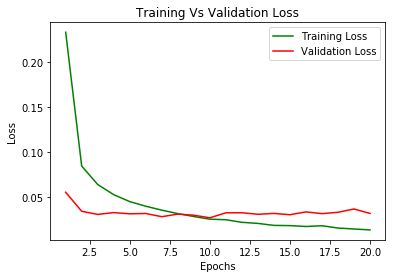

In [22]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs,training_loss,'g',label='Training Loss')
plt.plot(epochs,validation_loss,'r',label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

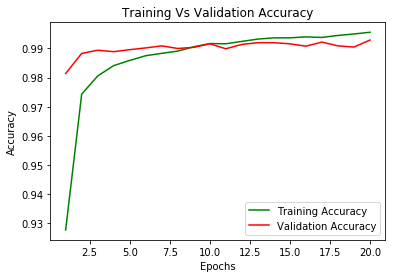

In [24]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,training_accuracy,'g',label="Training Accuracy")
plt.plot(epochs,validation_accuracy,'r',label="Validation Accuracy")
plt.title("Training Vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h4>Evaluate trained model on the test set</h4>

In [25]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0321 - accuracy: 0.9929
('Test loss:', 0.03209890858815745)
('Test accuracy:', 0.9929)


<h4>Visualizing some predictions</h4>

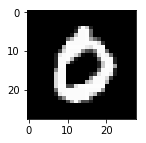

0


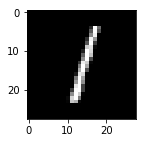

1


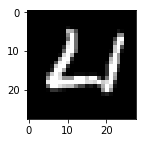

4


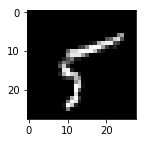

5


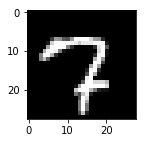

7


In [26]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))

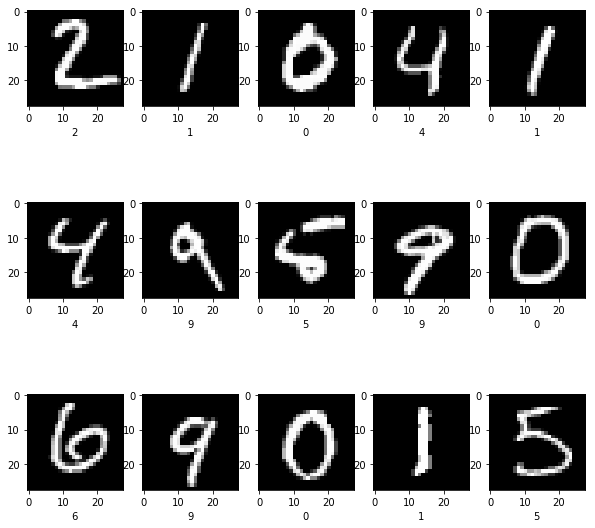

In [36]:
import numpy as np
fig = plt.figure(figsize=(10,10))
row = 3
col = 5
for i in range(1,row*col+1):
  fig.add_subplot(row,col,i)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  prediction = np.argmax(model.predict(x_test[i].reshape(1,28,28,1)))
  plt.xlabel(prediction)


plt.show()

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Saving the CNN

<h4>Save the trained weights and model in h5 files</h4>

In [0]:
#Set the path where you want to store the model and weights. 
model.save_weights('/content/gdrive/My Drive/Artificial Intelligence/mnist_cnn_checkpoint_10_loss0.0272.h5')